In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
train_data = pd.read_csv('dataset/train_data.csv')
val_data = pd.read_csv('dataset/val_data.csv')
test_data = pd.read_csv('dataset/test_data.csv')

# Memisahkan fitur dan label
X_train = train_data.drop('Disorder', axis=1).values
y_train = train_data['Disorder'].values

X_val = val_data.drop('Disorder', axis=1).values
y_val = val_data['Disorder'].values

X_test = test_data.drop('Disorder', axis=1).values
y_test = test_data['Disorder'].values   

# scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)   

# Reshape data for CNN
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_val_scaled = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))  

input_shape = (X_train_scaled.shape[1], 1)  

In [4]:
def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model     

# buat dan latih model
model = create_model(input_shape)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, model_checkpoint],
                    verbose=1)         

c:\Users\bania\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
 8/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1256 - loss: 2.5052

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.1320 - loss: 2.4909 - val_accuracy: 0.1562 - val_loss: 2.3087
Epoch 2/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2043 - loss: 2.2947 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2142 - loss: 2.2769 - val_accuracy: 0.2812 - val_loss: 2.0669
Epoch 3/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3274 - loss: 2.0694 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3332 - loss: 2.0494 - val_accuracy: 0.7292 - val_loss: 1.6428
Epoch 4/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4770 - loss: 1.7348 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4874 - loss: 1.7000 - val_accuracy: 0.8021 - val_loss: 1.0967
Epoch 5/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6465 - loss: 1.2941 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6334 - loss: 1.2886 - val_accuracy: 0.8438 - val_loss: 0.7220
Epoch 6/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7314 - loss: 0.9785 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7303 - loss: 0.9668 - val_accuracy: 0.8438 - val_loss: 0.4433
Epoch 7/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7525 - loss: 0.7617 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7591 - loss: 0.7582 - val_accuracy: 0.8438 - val_loss: 0.3159
Epoch 8/50
 8/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8073 - loss: 0.6705 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8114 - loss: 0.6308 - val_accuracy: 0.9062 - val_loss: 0.2541
Epoch 9/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8506 - loss: 0.4645 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8500 - loss: 0.4737 - val_accuracy: 0.9792 - val_loss: 0.1624
Epoch 10/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8639 - loss: 0.4777 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8650 - loss: 0.4767 - val_accuracy: 0.9375 - val_loss: 0.1543
Epoch 11/50
 9/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9052 - loss: 0.3035 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8994 - loss: 0.3249 - val_accuracy: 0.9792 - val_loss: 0.1184
Epoch 12/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9302 - loss: 0.3426 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9279 - loss: 0.3344 - val_accuracy: 0.9375 - val_loss: 0.1046
Epoch 13/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8595 - loss: 0.4256 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8733 - loss: 0.3842 - val_accuracy: 0.9688 - val_loss: 0.0913
Epoch 14/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8957 - loss: 0.2653 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9002 - loss: 0.2619 - val_accuracy: 0.9375 - val_loss: 0.0908
Epoch 15/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9353 - loss: 0.2016 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9360 - loss: 0.2048 - val_accuracy: 0.9792 - val_loss: 0.0725
Epoch 16/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9149 - loss: 0.2240 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9192 - loss: 0.2171 - val_accuracy: 0.9792 - val_loss: 0.0669
Epoch 17/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9161 - loss: 0.2129 - val_accuracy: 0.9375 - val_loss: 0.0776
Epoch 18/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9528 - loss: 0.1498 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9515 - loss: 0.1546 - val_accuracy: 0.9792 - val_loss: 0.0656
Epoch 19/50
10/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9745 - loss: 0.1167 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9670 - loss: 0.1325 - val_accuracy: 0.9792 - val_loss: 0.0585
Epoch 20/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9584 - loss: 0.1603 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9552 - loss: 0.1651 - val_accuracy: 0.9792 - val_loss: 0.0553
Epoch 21/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9301 - loss: 0.1825 - val_accuracy: 0.9792 - val_loss: 0.0594
Epoch 22/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9321 - loss: 0.1965 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9373 - loss: 0.1881 - val_accuracy: 0.9792 - val_loss: 0.0540
Epoch 23/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9490 - loss: 0.1418 - val_accuracy: 0.9688 - val_loss: 0.0633
Epoch 24/50
 6/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9556 - loss: 0.1393 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9536 - loss: 0.1440 - val_accuracy: 0.9792 - val_loss: 0.0527
Epoch 25/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9605 - loss: 0.1277 - val_accuracy: 0.9792 - val_loss: 0.0544
Epoch 26/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9645 - loss: 0.1087 - val_accuracy: 0.9688 - val_loss: 0.0603
Epoch 27/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9486 - loss: 0.1304 - val_accuracy: 0.9792 - val_loss: 0.0547
Epoch 28/50
11/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9771 - loss: 0.0920 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9754 - loss: 0.0937 - val_accuracy: 0.9792 - val_loss: 0.0475
Epoch 29/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9532 - loss: 0.1135 - val_accuracy: 0.9792 - val_loss: 0.0503
Epoch 30/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9514 - loss: 0.1050 - val_accuracy: 0.9688 - val_loss: 0.0598
Epoch 31/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9567 - loss: 0.1042 - val_accuracy: 0.9792 - val_loss: 0.0494
Epoch 32/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9512 - loss: 0.1182 - val_accuracy: 0.9688 - val_loss: 0.0607
Epoch 33/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9553 - loss: 0.1304 - val_accuracy: 0.9688 - val_loss: 0.0547


In [9]:
# model save
model.save('model/mental_health_cnn_model.h5')

# history save
with open('history/mental_health_cnn_history.json', 'w') as f:
    json.dump(history.history, f)   

In [16]:
# tampilkan hasil pelatihan
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])  
print("f1 score:", classification_report(y_test, model.predict(X_test_scaled).argmax(axis=1), output_dict=True)['weighted avg']['f1-score'])

Training Loss: 0.10187289118766785
Validation Loss: 0.05470563843846321
Training Accuracy: 0.968539297580719
Validation Accuracy: 0.96875
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
f1 score: 1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


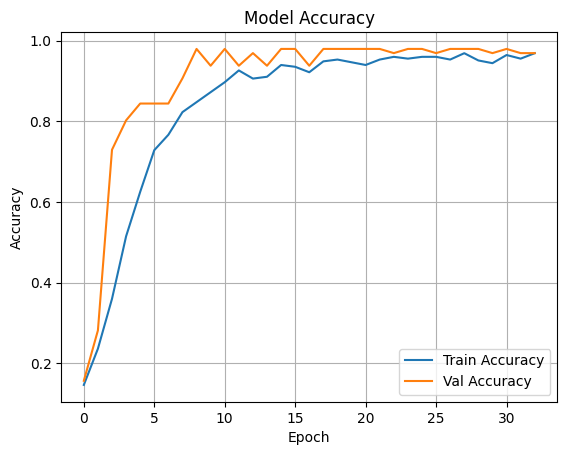

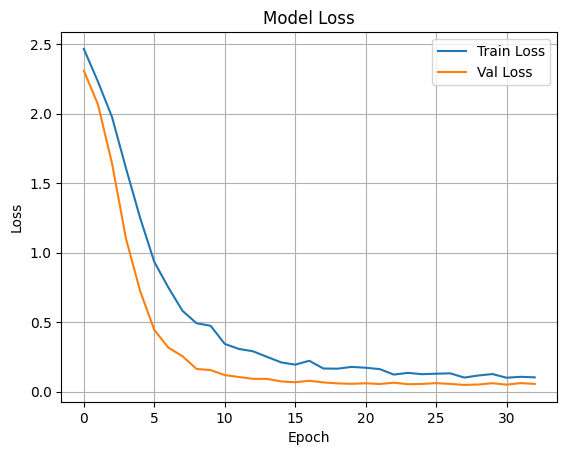

In [10]:
# --- Confusion Matrix & Classification Report ---
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)      
# --- Plotting ---
with open('history/mental_health_cnn_history.json', 'r') as f:
    hist = json.load(f)

plt.plot(hist['accuracy'], label='Train Accuracy')
plt.plot(hist['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(hist['loss'], label='Train Loss')
plt.plot(hist['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Text(0.5, 1.0, 'Confusion Matrix')

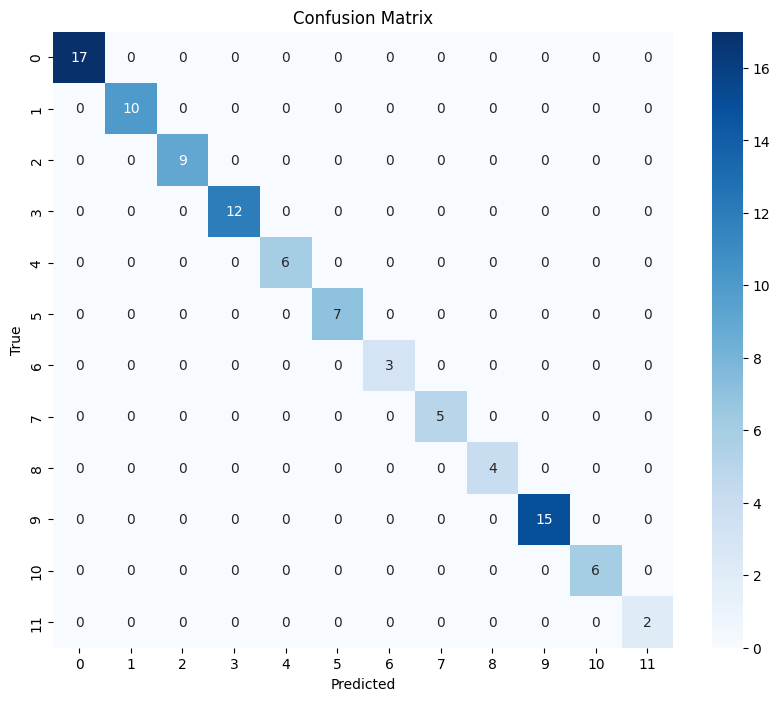

In [13]:
# tampilkan confusion matrix
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')       

In [15]:
from sklearn.metrics import classification_report

# misalnya y_test dan y_pred_classes sudah ada
print(classification_report(y_test, y_pred_classes, target_names=np.unique(y_test).astype(str)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         2

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



[23, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]


[23, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Predicted Disorder: [[1.8463219e-07 3.5285979e-05 2.6196116e-07 7.2207436e-04 5.1009733e-06
  1.5699694e-06 6.6364139e-01 3.3389881e-01 5.3052577e-07 5.2811043e-05
  1.6417945e-03 1.2848365e-07]]
Prediction: PTSD


ADHD: 0.00%
ASD: 0.00%
Loneliness: 0.00%
MDD: 0.07%
OCD: 0.00%
PDD: 0.00%
PTSD: 66.36%
Anxiety: 33.39%
Bipolar: 0.00%
Eating Disorder: 0.01%
Psychotic Depression: 0.16%
Sleeping Disorder: 0.00%




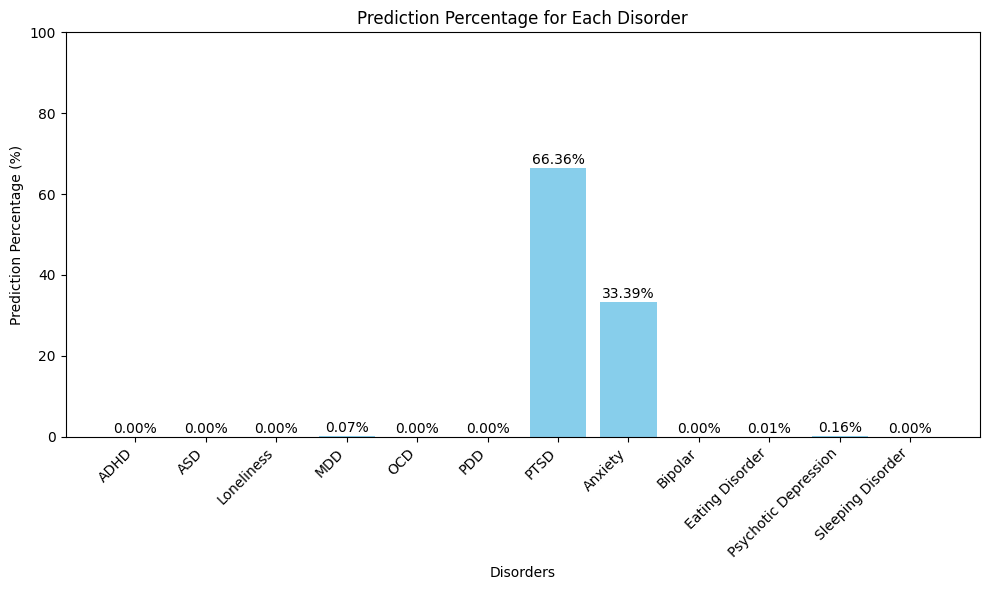

In [24]:
import random
from tensorflow.keras.models import load_model

loaded_model = load_model('model/mental_health_cnn_model.h5')

# Misalnya kita ingin memprediksi data baru
new_data = np.random.rand(1, X_train.shape[1])  # Ganti dengan data baru yang sesuai
new_data_scaled = scaler.transform(new_data.reshape(1, -1)).reshape((1, X_train.shape[1], 1))       

# input_data = [29,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0]  # Ganti dengan input Anda

# Menghasilkan nilai acak antara 0 atau 1 sebanyak 27 kali
random_values = [random.randint(0, 1) for _ in range(27)] # random value untuk gejala
input_data = [23] + random_values # input untuk umur
print(input_data)
print("\n")

# input_data = [
#     23,   # age
#     0,    # feeling.nervous
#     0,    # panic
#     0,    # breathing.rapidly
#     0,    # sweating
#     1,    # trouble.in.concentration
#     1,    # having.trouble.in.sleeping
#     1,    # having.trouble.with.work
#     0,    # hopelessness
#     1,    # anger
#     1,    # over.react
#     0,    # change.in.eating
#     0,    # suicidal.thought
#     1,    # feeling.tired
#     1,    # close.friend
#     0,    # social.media.addiction
#     0,    # weight.gain
#     1,    # introvert
#     0,    # popping.up.stressful.memory
#     1,    # having.nightmares
#     1,    # avoids.people.or.activities
#     0,    # feeling.negative
#     1,    # trouble.concentrating
#     0,    # blamming.yourself
#     0,    # hallucinations
#     0,    # repetitive.behaviour
#     1,    # seasonally
#     1] # increased.energy

print(input_data)
print("\n")

# Konversi input_data menjadi array numpy 2D dan ubah bentuknya agar sesuai dengan kebutuhan model
input_data = np.array([input_data])  # Mengonversi menjadi array numpy 2D dengan satu baris

# Lakukan prediksi
prediction = model.predict(input_data)

# Membuat prediksi
prediction = model.predict(input_data)
print("\n")
print(f"Predicted Disorder: {prediction}")

# Labels
labels = {
    0: "ADHD",
    1: "ASD",
    2: "Loneliness",
    3: "MDD",
    4: "OCD",
    5: "PDD",
    6: "PTSD",
    7: "Anxiety",
    8: "Bipolar",
    9: "Eating Disorder",
    10: "Psychotic Depression",
    11: "Sleeping Disorder",
    12: "Inconclusive"
}

# Mengambil label dari prediksi
predicted_label = labels[np.argmax(prediction)]

print(f"Prediction: {predicted_label}")
print("\n")

# Mendapatkan jumlah prediksi untuk setiap penyakit
predicted_percentages = (prediction[0] / prediction[0].sum()) * 100

# Menampilkan persentase prediksi untuk setiap penyakit
for i, percentage in enumerate(predicted_percentages):
    disorder_name = labels[i]
    print(f"{disorder_name}: {percentage:.2f}%")

print("\n")

# PLOT CHART

import matplotlib.pyplot as plt

# Membuat grafik batang menggunakan Matplotlib
disorder_names = [labels[i] for i in range(len(predicted_percentages))]
percentages = [predicted_percentages[i] for i in range(len(predicted_percentages))]

plt.figure(figsize=(10, 6))
plt.bar(disorder_names, percentages, color='skyblue')
plt.xlabel('Disorders')
plt.ylabel('Prediction Percentage (%)')
plt.title('Prediction Percentage for Each Disorder')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Menambahkan persentase di atas setiap batang
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()
